In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

In [ ]:
pip install lifelines


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 9.0 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=8cea47874d6596bcc1d0117816f10cf69ca493bff6b15c5ebf51fe723b9875f9
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

Dataset


In [ ]:
data = pd.read_csv('Survey Kepuasan Pengguna Layanan Braincore (Responses) - Form Responses 1.csv')
data.head(20)

,Timestamp,Nama,Pekerjaan,Jenis Layanan Yang Digunakan,Durasi pengerjaan berapa hari (dalam angka),Tingkat Kepuasan Terhadap Layanan,Kecepatan Merespon dan Kualitas Komunikasi,Kejelasan tentang proyek yang dikerjakan,Kecepatan Pengerjaan,Harga Pelayanan,Saran dan masukan terhadap Braincore,Apakah Anda akan merekomendasi Braincore ke orang lain?
0,8/29/2023 20:34:36,Jemima,Mahasiswa,Computer Vision,10,4,4,4,4,Sesuai,Udah okee,Ya
1,8/29/2023 20:49:08,Fahreza Ragil Winata,Mahasiswa,Data Science,14,4,4,4,4,Sesuai,Tidak ada,Ya
2,8/29/2023 21:05:19,Tri,Mahasiswa,ML Model Deployment,3,3,3,3,3,Sesuai,Deep learning please,Ya
3,8/29/2023 21:15:45,Siska,Mahasiswa,Data Science,5,4,4,4,4,Sesuai,"Tidak ada, pelayanan sangat baik dan responsif 👍",Ya
4,8/29/2023 21:35:01,Fajri Jeisyazidan Albarda,Mahasiswa,ML Model Deployment,2,4,4,4,4,Sesuai,"Naikkan gaji mas Eric, pelayanan keren++",Ya
5,8/29/2023 21:37:17,Rezah Aurellia,Mahasiswa,ML Model Deployment,2-7 hari,4,4,4,4,Sesuai,Belum ada sejauh ini belum mendapatkan kendala,Ya
6,8/30/2023 9:00:13,babas,Profesional,ML Model Deployment,5,4,4,4,4,Sesuai,jika memang makin banyak clientnya sarannya ja...,Ya
7,8/30/2023 13:21:27,Muhammad Kevin,Mahasiswa,ML Model Deployment,8,3,2,3,3,Sesuai,Penambahan dan peningkatan jenis layanan agar ...,Ya
8,9/2/2023 12:09:50,atika,Mahasiswa,ML Model Deployment,30,4,4,4,3,Sesuai,-,Ya
9,9/24/2023 15:37:44,Ryma,Mahasiswa,Computer Vision,1,4,4,4,4,Sesuai,-,Ya


In [ ]:
data.info() #untuk mengetahui informasi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Timestamp                                                20 non-null     object
 1   Nama                                                     20 non-null     object
 2   Pekerjaan                                                20 non-null     object
 3   Jenis Layanan Yang Digunakan                             20 non-null     object
 4   Durasi pengerjaan berapa hari (dalam angka)              20 non-null     object
 5   Tingkat Kepuasan Terhadap Layanan                        20 non-null     int64 
 6   Kecepatan Merespon dan Kualitas Komunikasi               20 non-null     int64 
 7   Kejelasan tentang proyek yang dikerjakan                 20 non-null     int64 
 8   Kecepatan Pengerjaan                      

Reprocessing Data


In [ ]:
#menghapus baris dan kolom
data.dropna(inplace=True)
# Menampilkan baris yang memiliki nilai kosong
print(data[data.isnull().any(axis=1)])

data.drop_duplicates(inplace=True)

Empty DataFrame
Columns: [Timestamp, Nama, Pekerjaan, Jenis Layanan Yang Digunakan, Durasi pengerjaan berapa hari (dalam angka), Tingkat Kepuasan Terhadap Layanan, Kecepatan Merespon dan Kualitas Komunikasi, Kejelasan tentang proyek yang dikerjakan, Kecepatan Pengerjaan, Harga Pelayanan, Saran dan masukan terhadap Braincore, Apakah Anda akan merekomendasi Braincore ke orang lain?]
Index: []


In [ ]:
data.drop_duplicates(inplace=True)
# Menampilkan baris yang duplikat
print(data[data.duplicated()])

Empty DataFrame
Columns: [Timestamp, Nama, Pekerjaan, Jenis Layanan Yang Digunakan, Durasi pengerjaan berapa hari (dalam angka), Tingkat Kepuasan Terhadap Layanan, Kecepatan Merespon dan Kualitas Komunikasi, Kejelasan tentang proyek yang dikerjakan, Kecepatan Pengerjaan, Harga Pelayanan, Saran dan masukan terhadap Braincore, Apakah Anda akan merekomendasi Braincore ke orang lain?]
Index: []


In [ ]:
def convert_to_days(value):
    value = str(value).lower()
    # Ekstrak angka dari string
    numbers = re.findall(r'\d+', value)
    is_range = '-' in value and len(numbers) == 2

    # Hitung rata-rata jika ada dua angka dengan tanda '-'
    average = (int(numbers[0]) + int(numbers[1])) / 2 if is_range else None

    # Konversi bulan ke hari jika ada kata 'bulan' di dalamnya
    is_month = 'bulan' in value
    days = int(numbers[0]) * 30 if is_month and numbers else None

    # Mengambil angka langsung jika tidak ada konversi khusus
    is_single_number = not is_range and not is_month and numbers
    single_number = int(numbers[0]) if is_single_number else None

    # Mengembalikan hasil yang tidak None
    return average or days or single_number

In [ ]:
# Menerapkan fungsi convert_to_days ke kolom yang diinginkan
data['Durasi pengerjaan berapa hari (dalam angka)'] = data['Durasi pengerjaan berapa hari (dalam angka)'].apply(convert_to_days)


In [ ]:
# Mengonversi tipe data kolom ke numerik, jika terjadi kesalahan konversi akan dikonversi menjadi NaN
data['Durasi pengerjaan berapa hari (dalam angka)'] = pd.to_numeric(data['Durasi pengerjaan berapa hari (dalam angka)'], errors='coerce')

In [ ]:
# Menampilkan data setelah proses pembersihan
print("\nFinal Data :")
data.head(21)


Final Data :


,Timestamp,Nama,Pekerjaan,Jenis Layanan Yang Digunakan,Durasi pengerjaan berapa hari (dalam angka),Tingkat Kepuasan Terhadap Layanan,Kecepatan Merespon dan Kualitas Komunikasi,Kejelasan tentang proyek yang dikerjakan,Kecepatan Pengerjaan,Harga Pelayanan,Saran dan masukan terhadap Braincore,Apakah Anda akan merekomendasi Braincore ke orang lain?
0,8/29/2023 20:34:36,Jemima,Mahasiswa,Computer Vision,10.0,4,4,4,4,Sesuai,Udah okee,Ya
1,8/29/2023 20:49:08,Fahreza Ragil Winata,Mahasiswa,Data Science,14.0,4,4,4,4,Sesuai,Tidak ada,Ya
2,8/29/2023 21:05:19,Tri,Mahasiswa,ML Model Deployment,3.0,3,3,3,3,Sesuai,Deep learning please,Ya
3,8/29/2023 21:15:45,Siska,Mahasiswa,Data Science,5.0,4,4,4,4,Sesuai,"Tidak ada, pelayanan sangat baik dan responsif 👍",Ya
4,8/29/2023 21:35:01,Fajri Jeisyazidan Albarda,Mahasiswa,ML Model Deployment,2.0,4,4,4,4,Sesuai,"Naikkan gaji mas Eric, pelayanan keren++",Ya
5,8/29/2023 21:37:17,Rezah Aurellia,Mahasiswa,ML Model Deployment,4.5,4,4,4,4,Sesuai,Belum ada sejauh ini belum mendapatkan kendala,Ya
6,8/30/2023 9:00:13,babas,Profesional,ML Model Deployment,5.0,4,4,4,4,Sesuai,jika memang makin banyak clientnya sarannya ja...,Ya
7,8/30/2023 13:21:27,Muhammad Kevin,Mahasiswa,ML Model Deployment,8.0,3,2,3,3,Sesuai,Penambahan dan peningkatan jenis layanan agar ...,Ya
8,9/2/2023 12:09:50,atika,Mahasiswa,ML Model Deployment,30.0,4,4,4,3,Sesuai,-,Ya
9,9/24/2023 15:37:44,Ryma,Mahasiswa,Computer Vision,1.0,4,4,4,4,Sesuai,-,Ya


Analysis


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Jenis Layanan Yang Digunakan'] = le.fit_transform(data['Jenis Layanan Yang Digunakan'])
data['Tingkat Kepuasan Terhadap Layanan'] = le.fit_transform(data['Tingkat Kepuasan Terhadap Layanan'])
data['Kecepatan Pengerjaan'] = le.fit_transform(data['Kecepatan Pengerjaan'])

In [ ]:
print(data.describe(include='all'))

                 Timestamp    Nama  Pekerjaan  Jenis Layanan Yang Digunakan  \
count                   20      20         20                      20.00000   
unique                  20      20          2                           NaN   
top     8/29/2023 20:34:36  Jemima  Mahasiswa                           NaN   
freq                     1       1         17                           NaN   
mean                   NaN     NaN        NaN                       1.40000   
std                    NaN     NaN        NaN                       0.88258   
min                    NaN     NaN        NaN                       0.00000   
25%                    NaN     NaN        NaN                       1.00000   
50%                    NaN     NaN        NaN                       1.00000   
75%                    NaN     NaN        NaN                       2.00000   
max                    NaN     NaN        NaN                       3.00000   

        Durasi pengerjaan berapa hari (dalam angka)

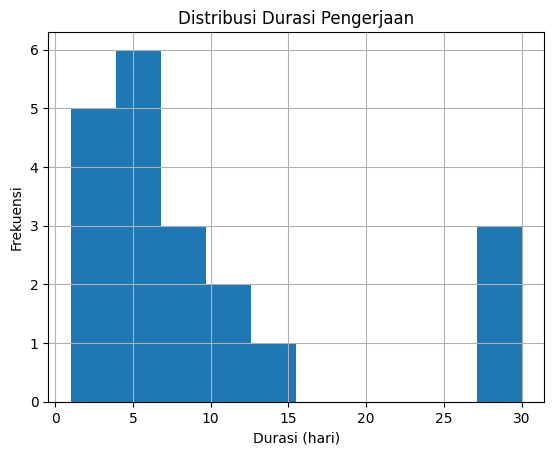

In [ ]:
data['Durasi pengerjaan berapa hari (dalam angka)'].hist()
plt.title('Distribusi Durasi Pengerjaan')
plt.xlabel('Durasi (hari)')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
# Menghitung dan menampilkan matriks korelasi
correlation_matrix = data[['Tingkat Kepuasan Terhadap Layanan', 'Kecepatan Pengerjaan']].corr()
print(correlation_matrix)

                                   Tingkat Kepuasan Terhadap Layanan  \
Tingkat Kepuasan Terhadap Layanan                           1.000000   
Kecepatan Pengerjaan                                        0.490098   

                                   Kecepatan Pengerjaan  
Tingkat Kepuasan Terhadap Layanan              0.490098  
Kecepatan Pengerjaan                           1.000000  


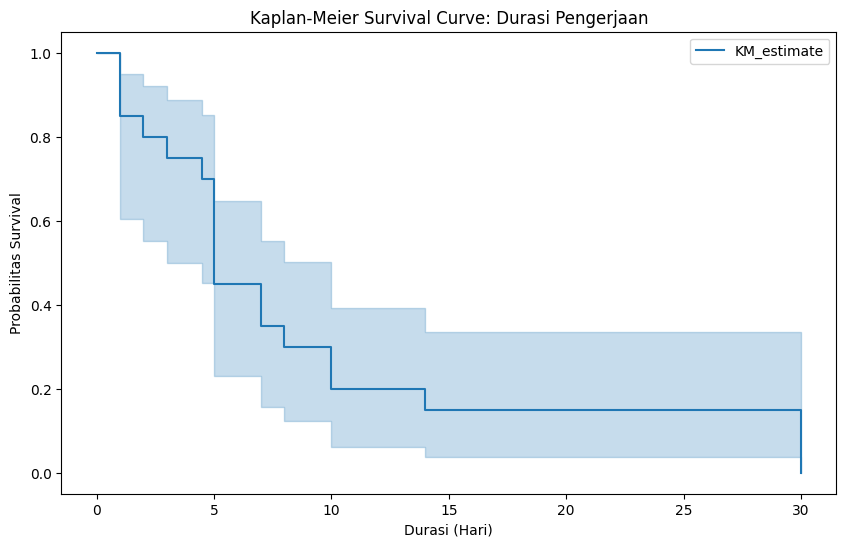

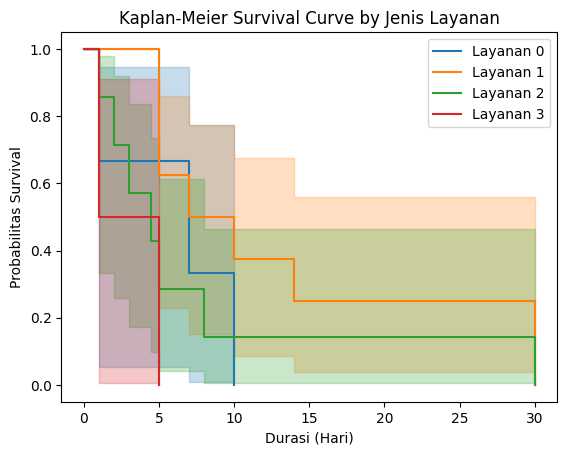

In [ ]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Data Survival: durasi pengerjaan dan status selesai (asumsi: semua selesai)
data['event'] = 1  # Semua pengerjaan selesai
kmf = KaplanMeierFitter()

# Fitting Kaplan-Meier Model
kmf.fit(data['Durasi pengerjaan berapa hari (dalam angka)'], event_observed=data['event'])

# Plotting Survival Function
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve: Durasi Pengerjaan')
plt.xlabel('Durasi (Hari)')
plt.ylabel('Probabilitas Survival')
plt.show()

# Menambahkan Analisis Berdasarkan Jenis Layanan
for layanan in data['Jenis Layanan Yang Digunakan'].unique():
    kmf.fit(
        data[data['Jenis Layanan Yang Digunakan'] == layanan]['Durasi pengerjaan berapa hari (dalam angka)'],
        event_observed=data[data['Jenis Layanan Yang Digunakan'] == layanan]['event'],
        label=f'Layanan {layanan}'
    )
    kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival Curve by Jenis Layanan')
plt.xlabel('Durasi (Hari)')
plt.ylabel('Probabilitas Survival')
plt.legend()
plt.show()


Application Word Cloud


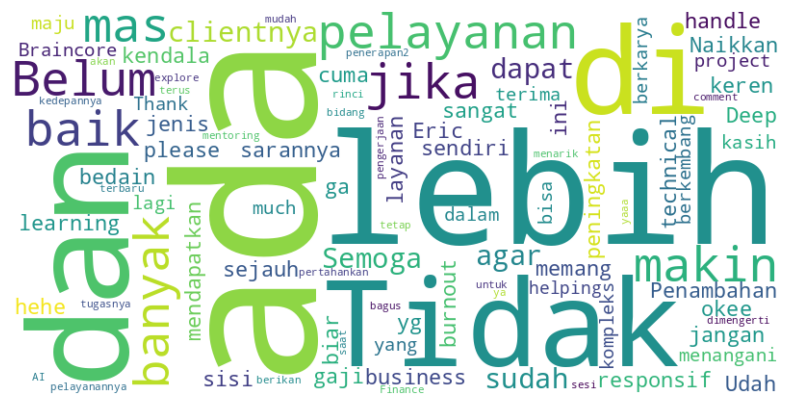

In [ ]:
# Gabungkan semua saran menjadi satu string
text = ' '.join(data['Saran dan masukan terhadap Braincore'].astype(str))

# Buat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Tampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Application Word Frequencies

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



10 Kata Paling Sering Muncul:
[('pelayanan', 2), ('mas', 2), ('clientnya', 2), ('semoga', 2), ('udah', 1), ('okee', 1), ('deep', 1), ('learning', 1), ('please', 1), ('responsif', 1)]


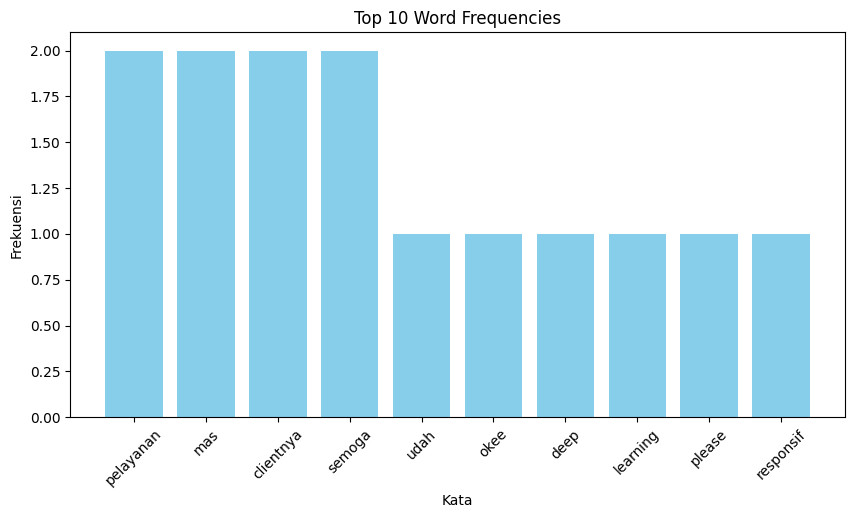

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download stopwords dan punktuasi jika belum ada
nltk.download('punkt')
nltk.download('stopwords')

# Menggabungkan semua teks dari kolom "Saran dan masukan terhadap Braincore"
text = ' '.join(data['Saran dan masukan terhadap Braincore'].dropna().astype(str))

# Tokenisasi teks menjadi kata-kata
words = word_tokenize(text.lower())

# Menghapus stopwords (kata umum yang tidak penting) dan karakter non-alfabetik
stop_words = set(stopwords.words('indonesian'))
filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

# Menghitung frekuensi kata
word_freq = Counter(filtered_words)

# Menampilkan 10 kata paling sering muncul
print("\n10 Kata Paling Sering Muncul:")
print(word_freq.most_common(10))

# Visualisasi 10 kata paling sering muncul
most_common_words = word_freq.most_common(10)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Top 10 Word Frequencies')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Gabungkan semua saran menjadi satu string
text = ' '.join(data['Saran dan masukan terhadap Braincore'].astype(str))

# Tokenisasi dan hitung frekuensi kata
words = re.findall(r'\w+', text.lower())
word_freq = Counter(words)

# Tampilkan frekuensi kata
for word, freq in word_freq.most_common(10):
    print(f'{word}: {freq}')


ada: 5
lebih: 5
dan: 4
tidak: 3
di: 3
pelayanan: 2
baik: 2
mas: 2
belum: 2
jika: 2
